In [11]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import StandardScaler


# Import the required modules
import pandas as pd
# pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas


# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA



# suppress warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'StandardScaler'

In [12]:
# Load the data into a Pandas DataFrame
df_MarketData = pd.read_csv(
                "Resources/crypto_market_data.csv",
                 index_col="coin_id")

# Display sample data
df_MarketData.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [13]:
# Generate summary statistics
df_MarketData.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_MarketData.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [ ]:
# Need to more information about dataset 

In [14]:
df_MarketData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [15]:
print(df_MarketData.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [16]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [17]:
# Create a DataFrame with the scaled data (fit, transform, copy, set the coinid column as index)
df_MarketData_scaled = pd.DataFrame(scaler.fit_transform(df_MarketData), 
                                     columns=df_MarketData.columns, 
                                     index=df_MarketData.index)


# Display sample data
df_MarketData_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [ ]:
# Before to find the Best Value for k Using the Original Data. 
# Use to t-SNE (t-distributed Stochastic Neighbor Embedding) as 
# exploratory data analysis, clustering visualization, and feature engineering.

####
t-SNE 

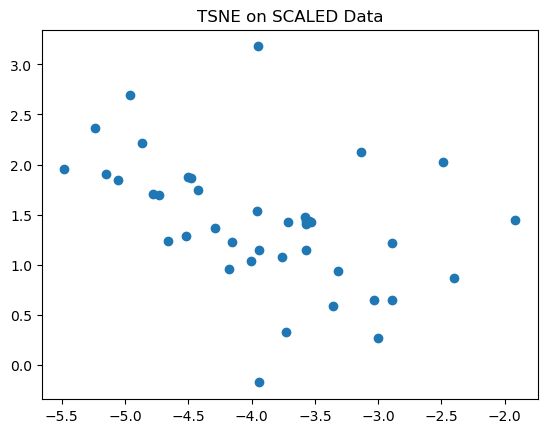

In [18]:
# Can this even be clustered?
tsne = TSNE()
df_MarketData_tsne1 = pd.DataFrame(tsne.fit_transform(df_MarketData_scaled))
# Plot the clusters
plt.scatter(df_MarketData_tsne1[0],df_MarketData_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

##### 
* **Interpretation:** t-SNE might not be the best method for visualizing this data because of the small sample size.



In [19]:
#K-Means on SCALED (not PCA) DATA
# Define your "X" - features to predict
X = df_MarketData_scaled

In [20]:
# Create  a list to store inertia, silhouettes, cha_chas values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 20)) # note that k=1 breaks the silhouette score metric, and this can be 2-11

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_means_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_means_model.fit(X)
    
    # predict the model
    predict_model = k_means_model.predict(X)
    
    # evaluate the model (generate the metrics)
    inertia.append( k_means_model.inertia_)
    score = silhouette_score(X, predict_model)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, predict_model)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [21]:
 # Using Elbow method
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,65.405923,0.251511,30.491836,-13.616512
4,6,52.933559,0.293221,30.953239,-12.472365
5,7,47.983124,0.237507,28.227194,-4.950435
6,8,37.288187,0.256063,31.570664,-10.694937
7,9,33.061685,0.205528,30.722973,-4.226502
8,10,28.779752,0.238327,30.904550,-4.281932
9,11,25.248499,0.216166,31.101037,-3.531253


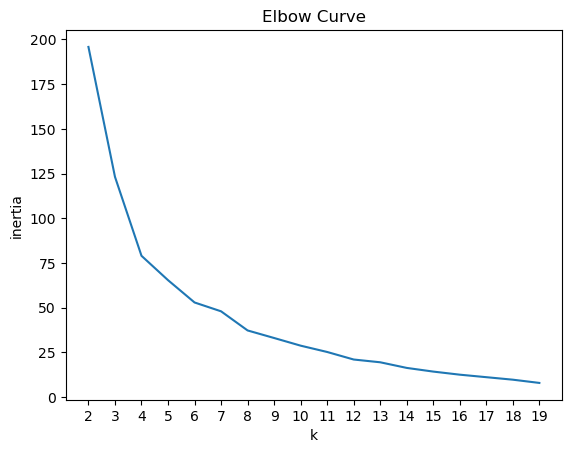

In [22]:
 # Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

##### 
* **Interpretation:** With k=4, the reduced inertia value suggests that data points are nearer to their respective cluster centers, which may result in more compact clusters. A higher silhouette score indicates that the clusters are better defined, with data points being more similar to those in their own cluster compared to others. Furthermore, a higher CHA score at k=4 reflects well-defined and more distinct clusters, improving the overall quality of the clustering. The accuracy value, relevant to the context of the analysis, could offer additional insights into the clustering performance at k=4, aiding in a thorough assessment of the clustering outcomes.





In [23]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
print(type(k), k)

<class 'list'> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [25]:
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_MarketData_scaled)
# 2.1. predict the model
    predict_molde = kmeans_model.predict(X)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

In [26]:
# Create a dictionary with the data to plot the Elbow curve
Market_Data_Elbow_Data = {"k":k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_Market_Data_Elbow = pd.DataFrame(Market_Data_Elbow_Data)

#Review the DataFrame
df_Market_Data_Elbow.head(20)

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [27]:
## Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
Market_Data_Elbow = df_Market_Data_Elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve k-Means", 
    xticks=k
)
Market_Data_Elbow

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The graph suggests that the optimal value for 'k' is likely 4.





---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [28]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [31]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_MarketData_scaled)

KMeans(n_clusters=4, random_state=42)

In [32]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_clusters = kmeans.predict(df_MarketData_scaled)

# Print the resulting array of cluster values.
print(predict_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [33]:
# Create a copy of the DataFrame
df_Market_Data_predicted = df_MarketData_scaled.copy()

In [34]:
# Add a new column to the DataFrame with the predicted clusters
df_Market_Data_predicted['Clusters'] = predict_clusters

# Display sample data
df_Market_Data_predicted.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [35]:
# Cleaning
df_Market_Data_predicted.loc[df_Market_Data_predicted.Clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


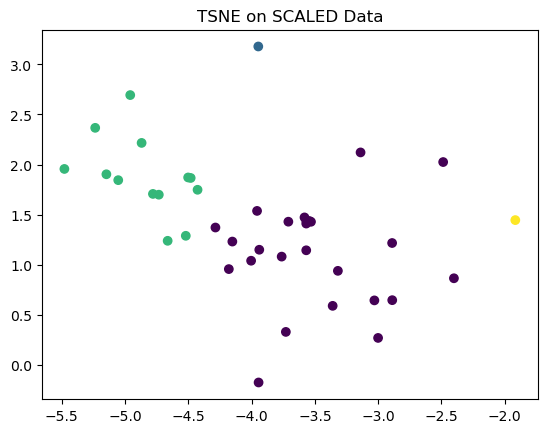

In [40]:
plt.scatter(df_MarketData_tsne1[0],df_MarketData_tsne1[1], c=df_Market_Data_predicted.Clusters)
plt.title("TSNE on SCALED Data")
plt.show()

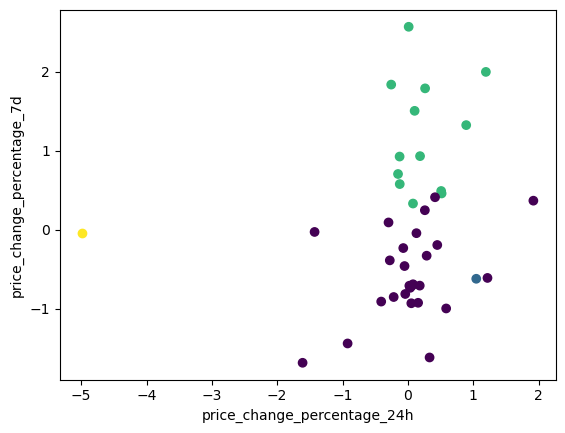

In [41]:
plt.scatter(df_Market_Data_predicted.price_change_percentage_24h, 
            df_Market_Data_predicted.price_change_percentage_7d, 
            c=df_Market_Data_predicted.Clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()

In [42]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_Market_Data_predicted.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="Clusters",
    hover_cols="coin_id"
    )

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Clusters,coin_id)

In [44]:
# using hvPlot with the same last requirement but this is by "Clusters"
scatter_plot = df_Market_Data_predicted.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Clusters",
    hover_cols="coin_id",
    title="Scatter Plot K-Means by Clusters - k=4"
    )
# Display the scatter plot
scatter_plot

:NdOverlay   [Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

#### 
Before creating a PCA model, you determine collinearity between variables.

In [45]:
corrs = df_MarketData_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


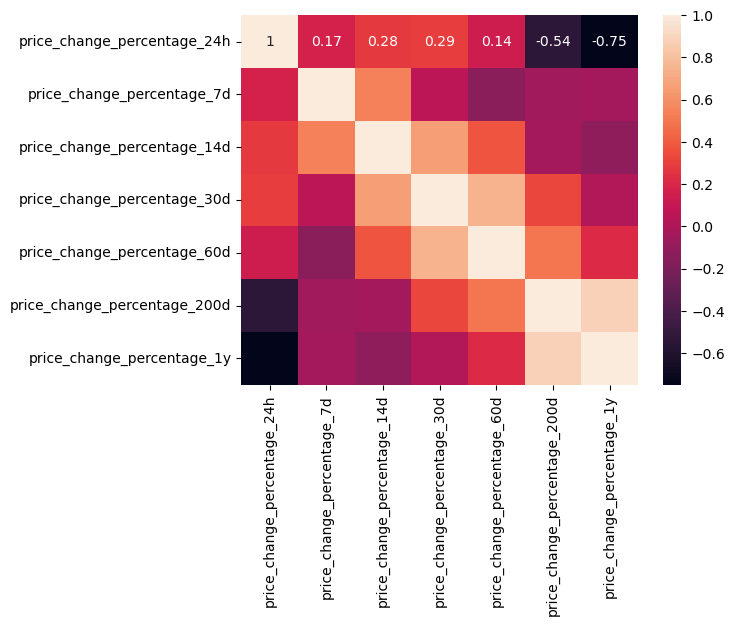

In [46]:
sns.heatmap(corrs, annot=True)
plt.show()

#### 
* **Interpretation:** High collinearity is indicated by a correlation close to 1 or -1 between two or more variables, which suggests a strong linear relationship exists between them.




In [47]:
# Create a PCA model with whole dataset scaled
# Init
n_components = len(df_MarketData_scaled.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed credit card DataFrame
pca_data = pca.fit_transform(df_MarketData_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_MarketData_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


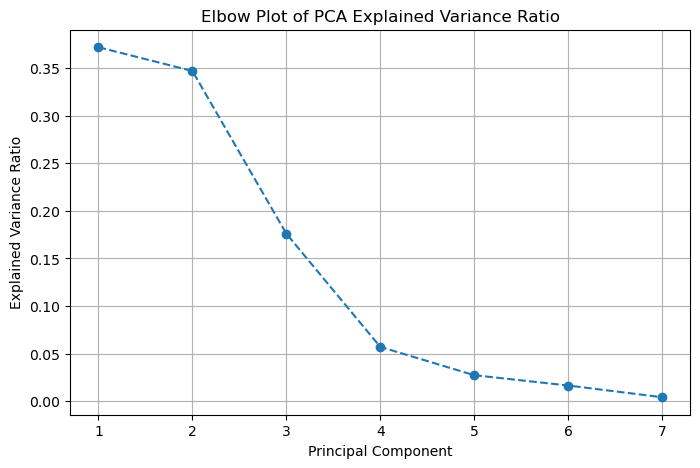

In [49]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [50]:
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793, 0.05705673, 0.02729754,
       0.0164632 , 0.00415086])

In [51]:
sum(explained_variance_ratio[0:5])

0.9793859343648177

In [54]:
# Create a PCA model instance and set `n_components=3`.
n_components=3
pca = PCA(n_components=n_components)

In [59]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_market_data = pca.fit_transform(df_MarketData_scaled)
# View the first five rows of the DataFrame. 
df_pca_market_data = pd.DataFrame(pca_market_data, columns=["PCA_" + str(x) for x in range(1, n_components+ 1)])
df_pca_market_data.index = df_MarketData_scaled.index
df_pca_market_data.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [60]:
# Retrieve the explained variance to determine how much information 
explained_variance = pca.explained_variance_ratio_
# can be attributed to each principal component.
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {ev}")

Explained Variance for PC1: 0.3719856032745437
Explained Variance for PC2: 0.34700812751851623
Explained Variance for PC3: 0.17603792623792408


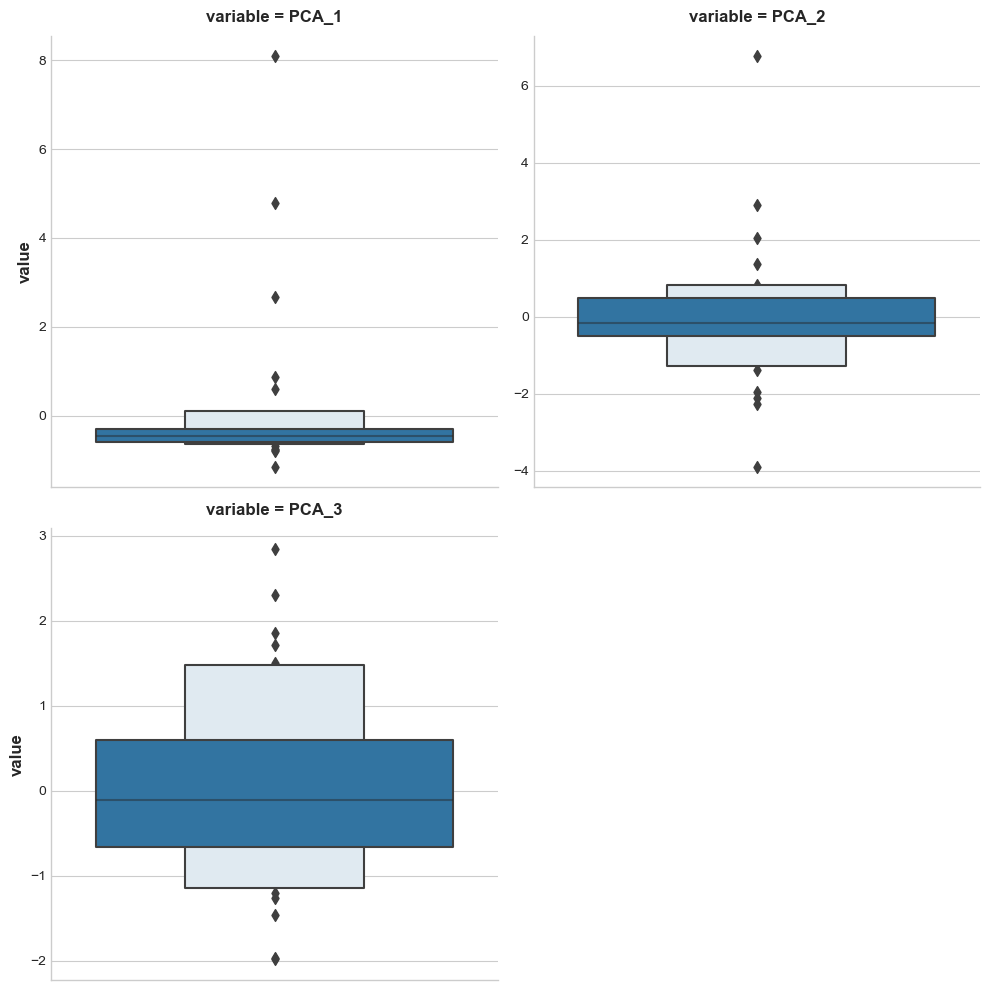

In [61]:
sns.catplot(
    y="value",
    col="variable",
    data=df_pca_market_data.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

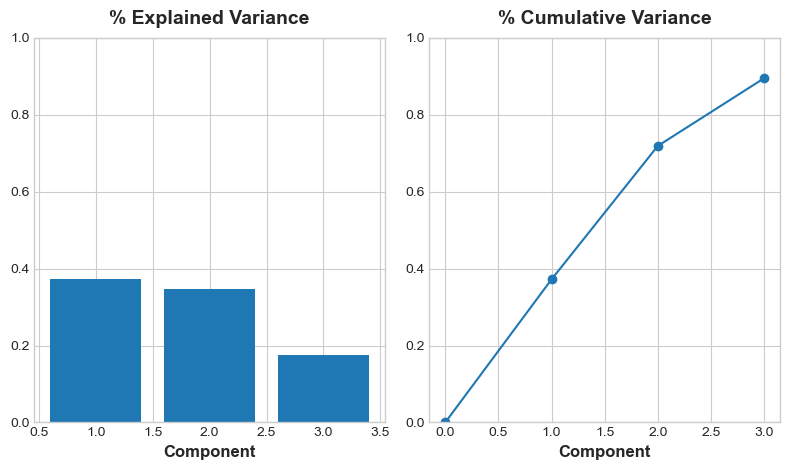

In [62]:
plot_variance(pca);

In [63]:
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [64]:
0.3719856 + 0.34700813 + 0.17603793

0.89503166

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The three principal components account for a total explained variance of 0.89503, meaning they collectively capture 89.50% of the overall variance in the data.





In [66]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df_market_data_pca_final = pd.DataFrame(data=pca_market_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_market_data_pca_final['coin_id'] = df_MarketData.index

# Set the coinid column as index
df_market_data_pca_final.set_index('coin_id', inplace=True)

# Display sample data
df_market_data_pca_final.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

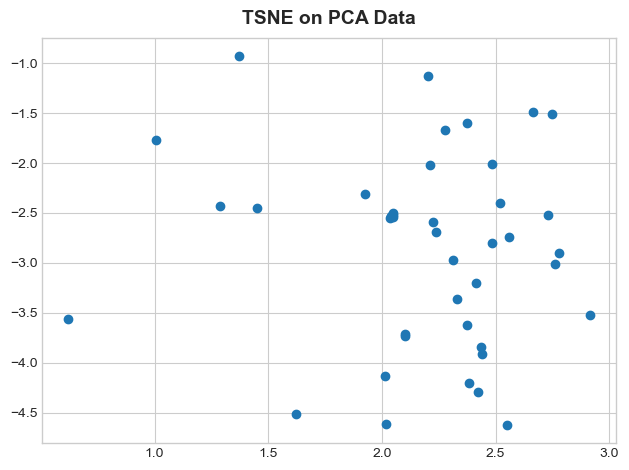

In [67]:
 # Can this even be clustered?
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_market_data_pca_final)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on PCA Data")
plt.show()

In [68]:
# Define your "X" - features to predict
X = df_market_data_pca_final

In [69]:
# general analysis
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 20)) # note that k=1 breaks the silhouette score metric, and this can be 2-11

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    predicted_model = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, predicted_model)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, predicted_model)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [70]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,165.901994,0.693036,21.385587,NaN
1,3,93.774626,0.741509,33.046144,-72.127368
2,4,49.665497,0.420800,51.455694,-44.109129
3,5,38.352251,0.407403,51.279819,-11.313245
4,6,27.618972,0.385937,58.104473,-10.733279
5,7,21.134056,0.381437,63.208887,-6.484916
6,8,17.437664,0.344275,64.731818,-3.696392
7,9,13.742792,0.324356,70.766201,-3.694872
8,10,10.484890,0.337084,80.942562,-3.257901
9,11,8.114986,0.358333,91.962860,-2.369905


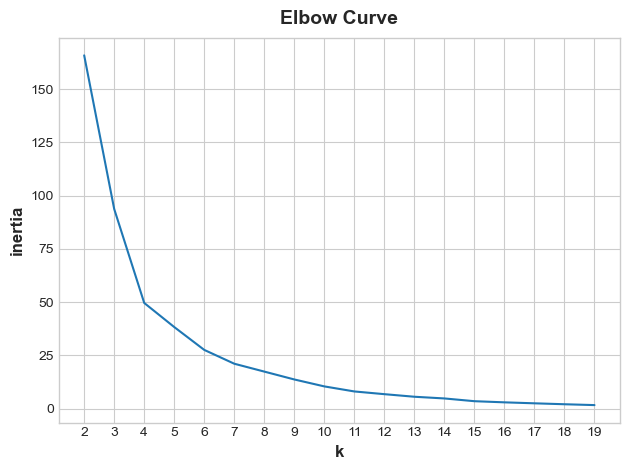

In [71]:
 # Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### 
* **Interpretation:** The total explained variance of the three principal components is 0.89503, indicating that they together represent 89.50% of the total variance in the dataset.








In [72]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12))
print(type(k), k)

<class 'list'> [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [73]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_market_data_pca_final)
#2.1 Predict the model
    kmeans_predicted=  kmeans_model.predict(df_market_data_pca_final)
# 3. Append the model.inertia_ to the inertia list and other metrics
    inertia.append(kmeans_model.inertia_)
    score = silhouette_score(df_market_data_pca_final, kmeans_predicted)
    silhouettes.append(score)
    cha_cha = calinski_harabasz_score(df_market_data_pca_final,kmeans_predicted)
    cha_chas.append(cha_cha)
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [74]:
# Create a dictionary with the data to plot the Elbow curve
market_data_pca_elbow = {"k":k, "inertia": inertia,"silhouette_score": silhouettes, "cha_score": cha_chas}
# Create a DataFrame with the data to plot the Elbow curve
df_market_data_pca_elbow = pd.DataFrame(market_data_pca_elbow)
df_market_data_pca_elbow["acc"] = df_market_data_pca_elbow.inertia.diff()

df_market_data_pca_elbow.head()

,k,inertia,silhouette_score,cha_score,acc
0,2,165.901994,0.693036,21.385587,NaN
1,3,93.774626,0.741509,33.046144,-72.127368
2,4,49.665497,0.420800,51.455694,-44.109129
3,5,38.352251,0.407403,51.279819,-11.313245
4,6,27.618972,0.385937,58.104473,-10.733279


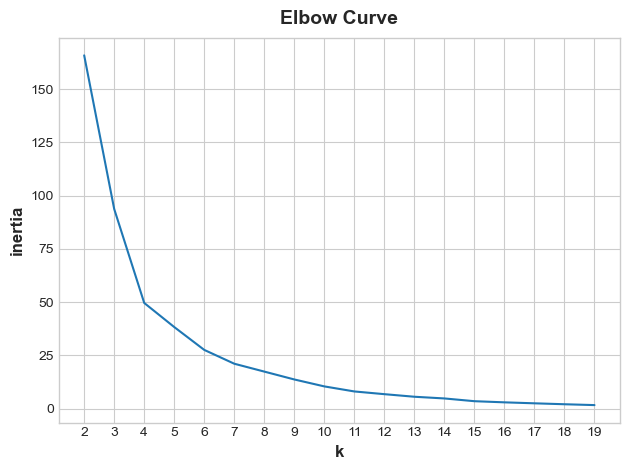

In [75]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [76]:
market_data_pca_elbow = df_market_data_pca_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve PCA",
    xticks=k
)
market_data_pca_elbow

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The optimal value for k when utilizing the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not. The optimal k value identified using both the original data and PCA data is 4, but the PCA model demonstrates a better fit.





### Cluster Cryptocurrencies with K-means Using the PCA Data

In [77]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state =0)

In [78]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data_pca_final)

KMeans(n_clusters=4, random_state=0)

In [79]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_predicted = kmeans_model.predict(df_market_data_pca_final)
# Print the resulting array of cluster values.
clusters_predicted

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [80]:
# Create a copy of the DataFrame with the PCA data
df_pca_data_predicted = df_market_data_pca_final.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_data_predicted['Clusters'] = clusters_predicted

# Display sample data
df_pca_data_predicted[:5]

,PC1,PC2,PC3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [81]:
df_pca_data_predicted.loc[df_pca_data_predicted.Clusters.isin([1,3])]

,PC1,PC2,PC3,Clusters
coin_id,,,,
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash-sv,-0.759014,-0.201200,-0.217653,3
crypto-com-chain,-0.248198,-1.376252,-1.462026,3
usd-coin,-0.438408,-0.175337,-0.663388,3
eos,-0.693425,-0.473815,-0.527597,3
tron,-0.393352,-0.108192,-0.012756,3
okb,0.064075,-1.269825,-1.098829,3
stellar,-0.489015,-0.732719,-0.062543,3


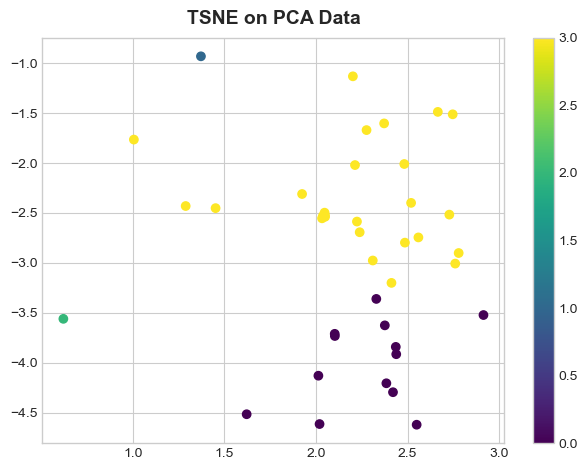

In [82]:
# Create a scatter plot using t-SNE
plt.scatter(df_tsne1[0], df_tsne1[1], c=df_pca_data_predicted.Clusters, cmap='viridis')
plt.title("TSNE on PCA Data")
plt.colorbar()
plt.show()

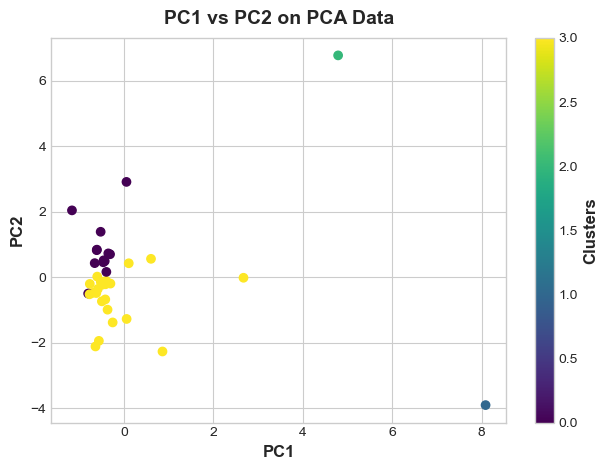

In [83]:
plt.scatter(df_pca_data_predicted.PC1, df_pca_data_predicted.PC2, c=df_pca_data_predicted.Clusters, cmap='viridis')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.title("PC1 vs PC2 on PCA Data")
plt.colorbar(label='Clusters')
plt.show()

In [84]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_data_predicted.hvplot.scatter(
    width=800,
    height=400,
    x="PC1",
    y="PC2",
    by="Clusters",  # Color the graph points with the labels found using K-Means
    hover_cols=["coin_id"],  # Add the crypto name in the hover_cols parameter
    title="Scatter Plot PCA by Clusters - k=4"
)
# Display the scatter plot
scatter_plot_pca

:NdOverlay   [Clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [88]:
# Composite plot to contrast the Elbow curves
Market_Data_Elbow + market_data_pca_elbow

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [89]:
# Composite plot to contrast the clusters
scatter_plot + scatter_plot_pca

:Layout
   .NdOverlay.I  :NdOverlay   [Clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Clusters]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The outcomes from both the elbow and scatter plots are comparable; however, the scatter plot of the PCA model shows that the clusters are distributed more clearly on the graph, indicating a better fit.